# **SALES DATA ANALYSIS**

# 🌟 Adarsh Singh  
📧 **Email**: [adarshsingh09.09.03@gmail.com](mailto:adarshsingh09.09.03@gmail.com)  
🔗 **LinkedIn**: [linkedin.com/in/adarsh-09-singh/](https://www.linkedin.com/in/adarsh-09-singh/)  
💻 **Github**: [Sales-Data-Analysis](https://github.com/AdarshSingh09/Sales-Data-Analysis) 

## 📄 Project Overview
This project analyzes 12 months of sales data from an electronics store to answer key business questions and uncover insights. The dataset contains hundreds of thousands of purchase records, including details such as month, product type, cost, and purchase address. 

We use **Python Pandas** for data manipulation and **Matplotlib** for data visualization to explore and answer high-level business questions.



## 🧹 Data Cleaning
Before diving into the analysis, we cleaned the dataset by:
- Dropping `NaN` values from the DataFrame.
- Removing rows based on specific conditions.
- Converting columns to appropriate data types (e.g., `to_numeric`, `to_datetime`).

## ❓ Business Questions Explored
We answered the following key business questions:
1. **What was the best month for sales?**  
   - How much revenue was earned that month?
2. **Which city sold the most products?**
3. **What time should we display advertisements to maximize sales?**
4. **What products are most often sold together?**
5. **What product sold the most, and why?**

## 🛠️ Techniques Used
To answer these questions, we utilized the following methods:
- **Data Manipulation**:
  - Concatenating multiple CSV files into a single DataFrame using `pd.concat()`.
  - Adding new columns by parsing existing data.
  - Applying custom logic with `.apply()` and `.groupby()` for aggregate analysis.
- **Data Visualization**:
  - Creating bar charts and line graphs to visualize sales trends.
  - Labeling and styling graphs for better readability.

## 📊 Key Insights
- The **best month for sales** was December with total sales of 4613443.34 USD ($).
- **San Francisco CA** sold the most products.
- **Peak advertisement times** were slightly before 11 AM and 7 PM.
- **Frequently purchased product combinations** were analyzed to suggest bundle deals.
    - iPhone & Lightning Charging Cable --> 1005
    - Google Phone, USB-C Charging Cable --> 987 
- The **most sold products**, AAA and AA batteries, were popular due to their relatively low prices compared to other items. 

## 💻 Code Implementation

### Importing Libraries

In [30]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


### Merging Data

In [31]:
# open()
# 'r' - open file for reading - default
# 'w' - open file for writing
# 'x' - creates file if not exist else fails 
# 'a' - appends. Adds more content to the file at end
# 't' - text file - default
# 'b' - binary file
# '+' - used to both read and write (UPDATE) file 

* ***Merging***

In [32]:
# all_months_data = pd.DataFrame()

# for file in os.listdir('/kaggle/input/keith-sales-data/'):
#     df = pd.read_csv('/kaggle/input/keith-sales-data/'+file)
#     all_months_data = pd.concat([all_months_data, df])

# all_months_data.head()

* ***Saving resultant dataframe to csv format***

In [33]:
# all_months_data.to_csv('/kaggle/working/all_data.csv', index=False)

### Updated Dataframe

In [34]:
all_data = pd.read_csv('/kaggle/input/keith-sales-data/all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [35]:
all_data.shape

(186850, 6)

## Cleaning Data

#### NaN Values

In [36]:
# Number of rows containing any Null values
all_data.isnull().any(axis=1).sum()

545

In [37]:
# how='all' drops those rows which have all columns Nan 
all_data = all_data.dropna(how='all')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


#### Get rid of text in order date column

* ***We encountered the first 2 characters of Order Date were "Or" in some row. So we need to check that row and clean it.***

In [38]:
all_data[all_data['Order Date'].str[:2]=='Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


* ***Removing these "Or" data***

In [39]:
all_data = all_data[all_data['Order Date'].str[:2]!='Or']

#### Correcting Column Data Type

In [40]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype('int64')
all_data['Price Each'] = all_data['Price Each'].astype('float')

## Augment Data

#### Add Month Column

In [41]:
all_data['Month'] = all_data['Order Date'].apply(lambda x:int(x[:2]))

In [42]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add City Column

In [43]:
all_data["City"] = all_data["Purchase Address"].apply(lambda x:x.split(',')[1].strip() + " " + x.split(',')[2].split(' ')[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA


## Data Exploration

## Question 1: What was the best month for sales? How much was earned that month?

In [44]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']

In [45]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas TX,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston MA,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA,11.99


In [46]:
month_sales = all_data.groupby('Month', as_index =False)['Sales'].sum().sort_values('Sales', ascending=0)
display(month_sales)

,Month,Sales
11,12,4613443.34
9,10,3736726.88
3,4,3390670.24
10,11,3199603.20
4,5,3152606.75
2,3,2807100.38
6,7,2647775.76
5,6,2577802.26
7,8,2244467.88
1,2,2202022.42


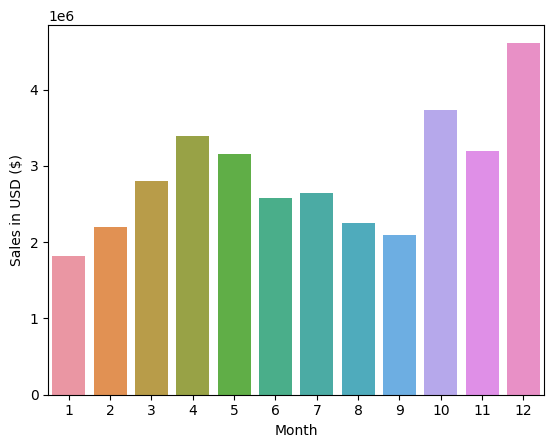

In [47]:
sns.barplot(month_sales, x='Month', y='Sales')
plt.ylabel('Sales in USD ($)')
plt.show()

* ### *The best month for sales was DECEMBER, the total sales in december were worth 4613443.34 USD ($)*

## Question 2: What city sold the most product?

In [48]:
city_sales = all_data.groupby('City', as_index=False)['Sales'].sum().sort_values('Sales', ascending=0)
display(city_sales)

,City,Sales
8,San Francisco CA,8262203.91
4,Los Angeles CA,5452570.80
5,New York City NY,4664317.43
2,Boston MA,3661642.01
0,Atlanta GA,2795498.58
3,Dallas TX,2767975.40
9,Seattle WA,2747755.48
7,Portland OR,1870732.34
1,Austin TX,1819581.75
6,Portland ME,449758.27


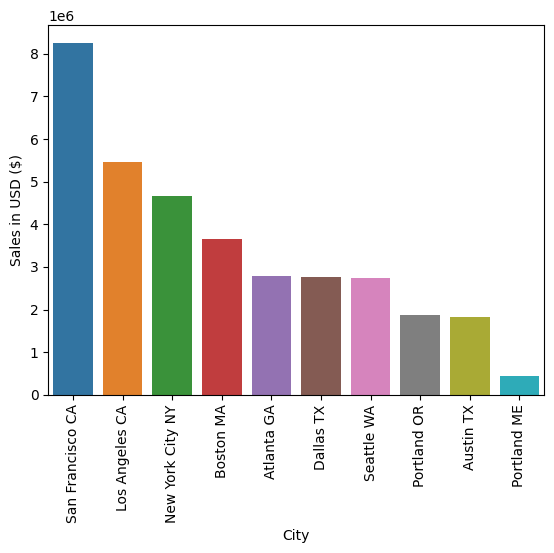

In [49]:
sns.barplot(city_sales, x='City', y='Sales')
plt.xticks(rotation=90)
plt.ylabel('Sales in USD ($)')
plt.show()

* ### *San Francisco CA sold the most products*

## Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [50]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

<ipython-input-50-40e2c8893c1f>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [51]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas TX,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston MA,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA,11.99


In [52]:
all_data['Hour'] = all_data['Order Date'].dt.hour

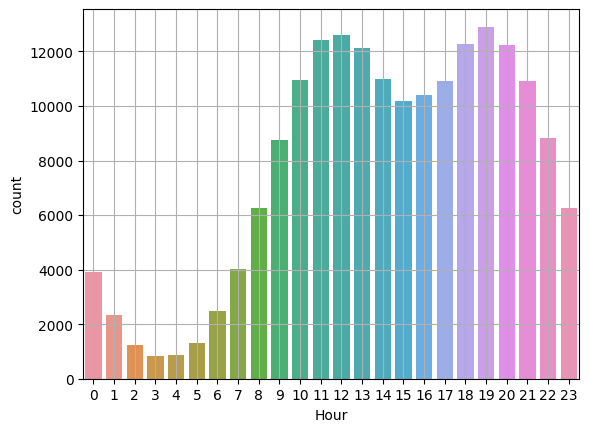

In [53]:
sns.countplot(all_data, x='Hour')
plt.grid()
plt.show()

* ### *Advertizing slightly before 11 AM and 7 PM*

## Question 4: What products are most often sold together?

In [54]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

<ipython-input-54-1accdb5968b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [55]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


* ### *iPhone and Lightning Charging Cable were most often sold together. (1005 times!)*

## Question 5: What product sold the most? Why do you think it sold the most?

In [56]:
all_data['Quantity Ordered'].dtypes

dtype('int64')

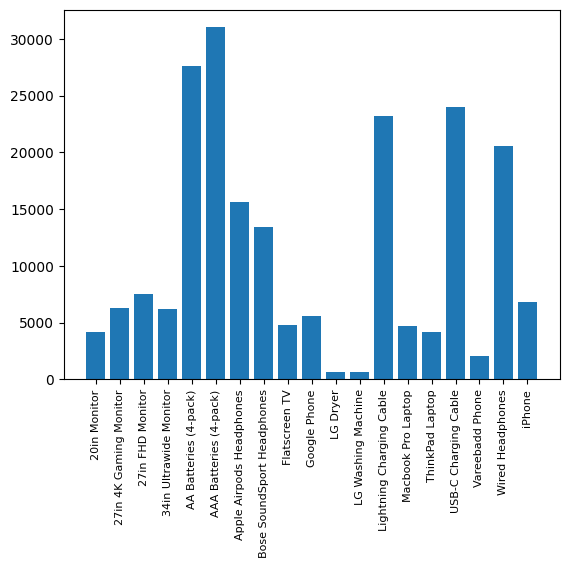

In [57]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

<ipython-input-58-7d6c0521dcaa>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)


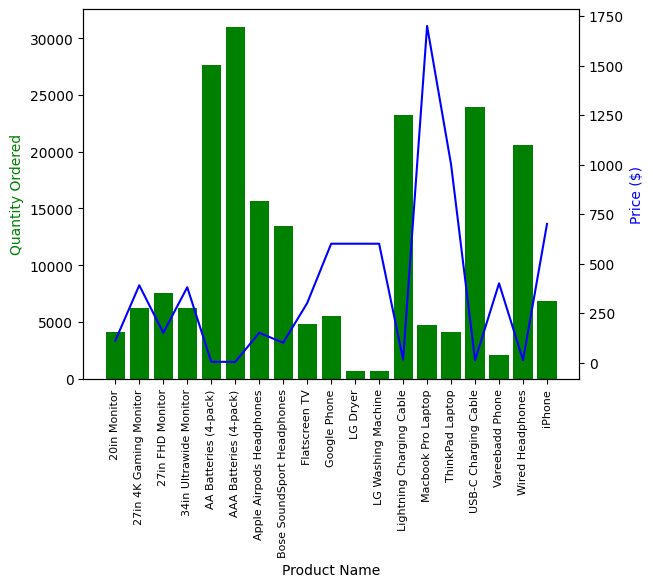

In [58]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

* ### *As you can see in the above graph the products that sold the most (AAA & AA Bateries) were cheap in prices relative to other products.*